# Data science process
- Problem definition
- Data acquisition
- Data preparation and EDA (Exploratory Data Analysis)
- Feature Engineering and Feature extraction
- Model planning
- Model building
- Model Evaluation
- Model Deployment


## (1) Problem Definition
- Housing Finance company deals with home loans.
- The dataset is provided to identify the customer segments that are eligible for loan amount so that they can specifically target these customers.

## (2) Data Acquisition


**The dataset contains following 13 features information**

* Loan_ID	Unique Loan ID
* Gender	Male/ Female
* Married	Applicant married (Y/N)
* Dependents	Number of dependents
* Education	Applicant Education (Graduate/ Under Graduate)
* Self_Employed	Self employed (Y/N)
* ApplicantIncome	Applicant income
* CoapplicantIncome	Coapplicant income
* LoanAmount	Loan amount in thousands
* Loan_Amount_Term	Term of loan in months
* Credit_History	credit history meets guidelines
* Property_Area	Urban/ Semi Urban/ Rural
* Loan_Status	(Target) Loan approved (Y/N)

## (3) Data Preparation
- Data Exploration
- Data Cleaning
- Missing value treatments
- Outlier handling
- Data encoding techniques
- Feature engineering
- Challenges of high dimensionality
- Dimension reduction using principal component analysis

In [653]:
#Loading Packages
import pandas as pd 
import numpy as np      

import seaborn as sns                 
import matplotlib.pyplot as plt       
%matplotlib inline 
#pip install plotly
import plotly.express as px

import warnings  
warnings.filterwarnings("ignore")

In [654]:
data=pd.read_csv("data/loan.csv")
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


## Data Exploration

In [655]:
data.shape

(614, 13)

In [656]:
print('number of rows', data.shape[0])
print('number of columns',data.shape[1])

number of rows 614
number of columns 13


In [657]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [658]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [659]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [660]:
print('integer type data', data.select_dtypes(include='int64').shape)

integer type data (614, 1)


In [661]:
# how many columns are of integer type
print('number of columns of integer type', data.select_dtypes(include='int64').shape[1])
# how many columns are of object type
print('number of columns of object type', data.select_dtypes(include='object').shape[1])
# how many columns are of float type
print('number of columns of float type', data.select_dtypes(include='float64').shape[1])

number of columns of integer type 1
number of columns of object type 8
number of columns of float type 4


In [662]:
# Summary of numeric (int and float) data

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [663]:
# Summary of object data

data.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [664]:
# Aggregation by grouping
# Frequency
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [665]:
# Relative Frequency
data['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [666]:
# Identify duplicate data
# data[data.duplicated()==True]
data[data.duplicated()].sum()

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

## Data Visualization

## Univariate Analysis

## Numerical Attribute Analysis :Histogram

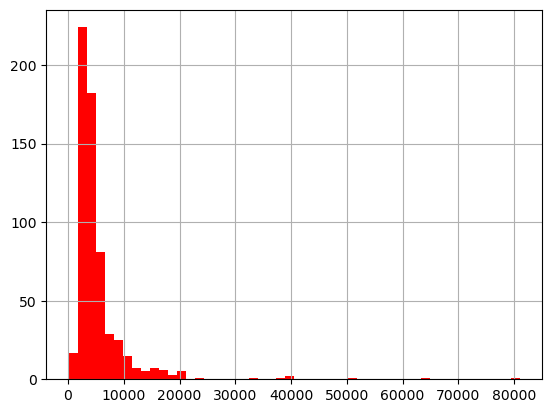

In [667]:
data['ApplicantIncome'].hist(bins=50,color='red')
plt.show()

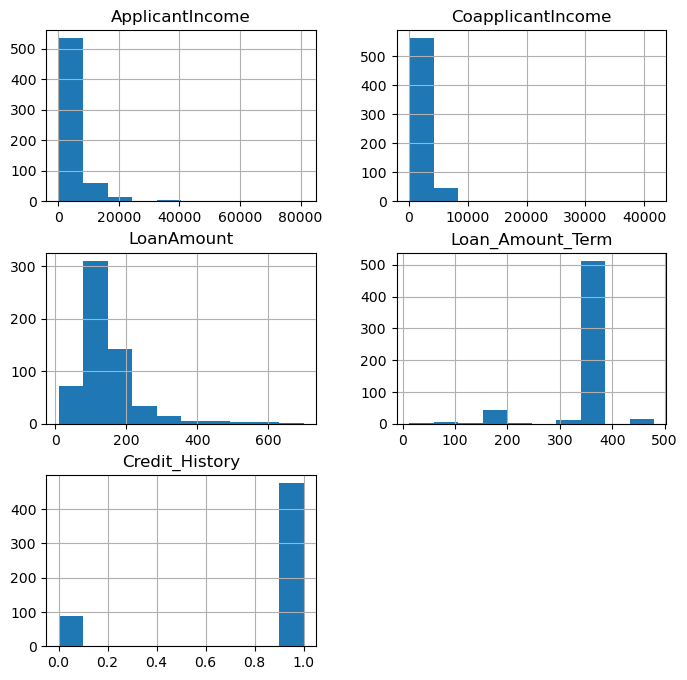

In [668]:
data.hist(figsize=(8,8))
plt.show()

<Axes: xlabel='ApplicantIncome'>

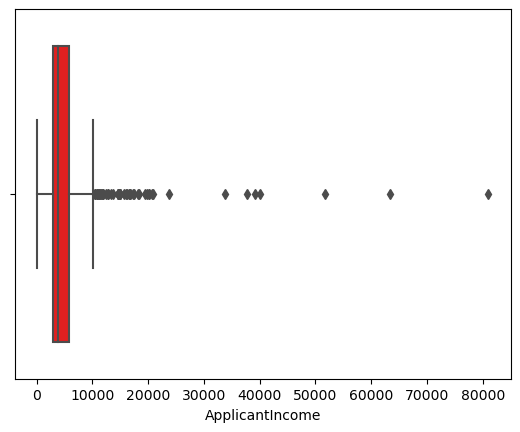

In [669]:
sns.boxplot(data=data, x='ApplicantIncome',color="red")

In [670]:
px.box(data,x='ApplicantIncome')

In [671]:
# identify the unique values
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [672]:
data.drop (['Loan_ID'],inplace=True,axis=1)
{column:list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Male', 'Female', nan],
 'Married': ['No', 'Yes', nan],
 'Dependents': ['0', '1', '2', '3+', nan],
 'Education': ['Graduate', 'Not Graduate'],
 'Self_Employed': ['No', 'Yes', nan],
 'Property_Area': ['Urban', 'Rural', 'Semiurban'],
 'Loan_Status': ['Y', 'N']}

## Bivariate Analysis using visualization

## Stacked Histogram

In [673]:
Gdr=pd.crosstab(data['Gender'],data['Loan_Status'])
Gdr

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<Axes: xlabel='Gender'>

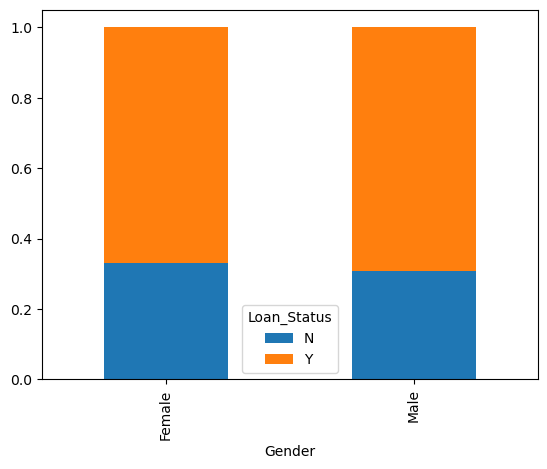

In [674]:
Gdr.div(Gdr.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [675]:
Edu=pd.crosstab(data['Education'],data['Loan_Status'])
Edu

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [676]:
140+340

480

In [677]:
140/480

0.2916666666666667

In [678]:
340/480

0.7083333333333334

In [679]:
Edu.div(Edu.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


Text(0, 0.5, 'Rel.Frequency')

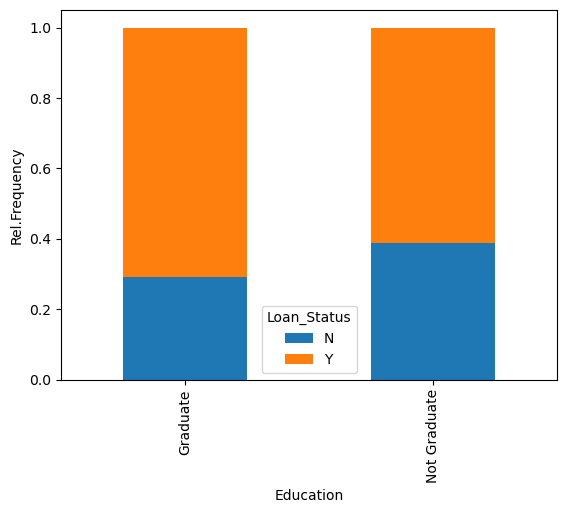

In [680]:

Edu.div(Edu.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Education")
plt.ylabel("Rel.Frequency")

In [681]:
data.groupby('Gender')['Loan_Status'].count()

Gender
Female    112
Male      489
Name: Loan_Status, dtype: int64

<Axes: xlabel='Gender'>

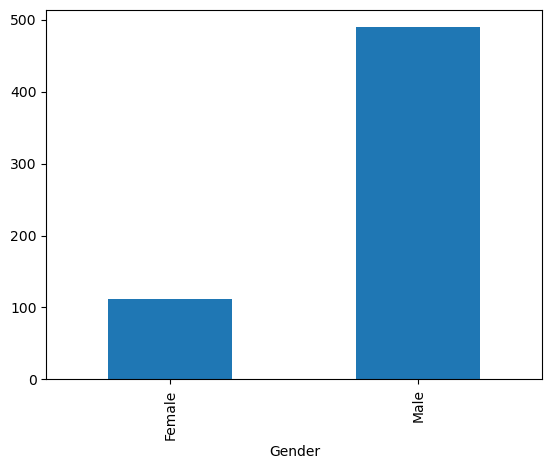

In [682]:
data.groupby('Gender')['Loan_Status'].count().plot(kind='bar')

## Data Cleaning

## Missing Value 


In [683]:
# Identify the missing values under each column
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [684]:
# Total missing values
data.isnull().sum().sum()

149

In [685]:
# % missing values
(data.isnull().sum().sum()/len(data))*100

24.267100977198698

In [686]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


## impute the missing data

In [687]:
# percentage of missing data whandling based on the domain knowledge

# <5% - remove the rows which are having missing values (Deletion)

# 5% to 10% - impute using mean, median (numeric data) or mode(non-numeric data)
# 5% to 10% - forward fill/backward fill (is used for time-series data)

# 10% to 20% - regression, KNN imputation, interpolation

# >20% - drop that column / attribute based on the relevance 
# >20% - factorization, random techniques

<Axes: >

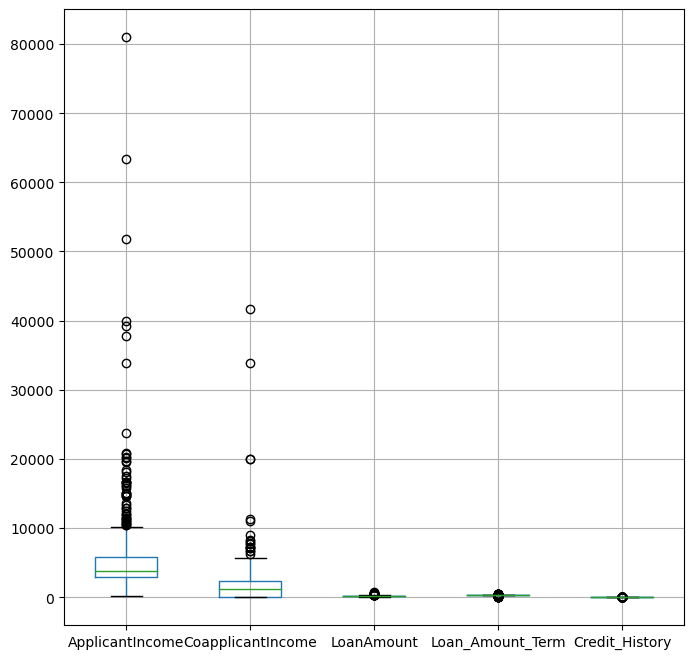

In [688]:
# Impute with mean provided outliers are not there
data.boxplot(figsize=(8,8))

In [689]:
# use median to impute the missing values for numeric attributes
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].median(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)

In [690]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [691]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [692]:
# use mode to impute the missing values for object type attributes
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [693]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [694]:
d=pd.DataFrame([10,20,30,30,10])
d.mode()[0]

0    10
1    30
Name: 0, dtype: int64

In [695]:
d=pd.DataFrame([10,20,30,30,10,np.nan,np.nan])
d

,0
0,10.0
1,20.0
2,30.0
3,30.0
4,10.0
5,NaN
6,NaN


In [696]:
d.fillna(d.mode()[0],inplace=True)
d

,0
0,10.0
1,20.0
2,30.0
3,30.0
4,10.0
5,10.0
6,10.0


In [697]:
from sklearn.impute import SimpleImputer

# Create the array
scores = np.array([15, np.nan, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9, np.nan])


# Create a SimpleImputer object with the mean strategy
imputer = SimpleImputer(strategy='median')

# # Fit and transform the imputer on the scores array
imputed_scores = imputer.fit_transform(scores.reshape(-1,1))


# # Print the imputed scores in one dimension
print(imputed_scores.flatten())

[15. 13. 18.  7. 13. 16. 11. 21.  5. 15. 10.  9. 13.]


## Outlier detection ways
- box plot or histogram
- Z-score
- IQR (Inter Quartile Range)

In [698]:
scores=np.array([15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9,-201])

In [699]:
scores

array([  15,  101,   18,    7,   13,   16,   11,   21,    5,   15,   10,
          9, -201])

<Axes: >

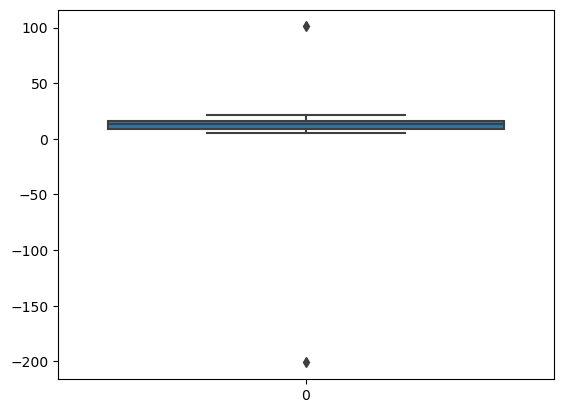

In [700]:
# Box plot
sns.boxplot(scores)

<Axes: ylabel='Count'>

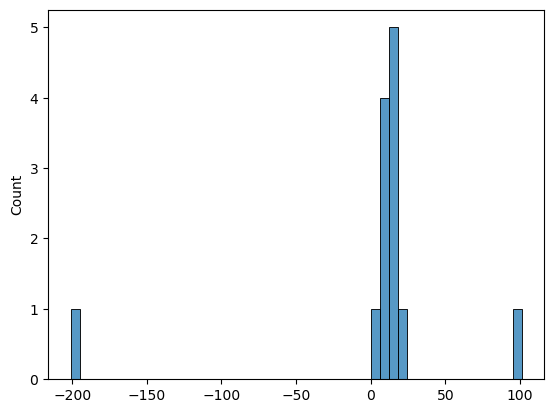

In [701]:
# histogram
sns.histplot(scores)

In [702]:
# Z-score
# Z = ( x - mean ) / std_dev
scores=np.array([15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9,-201])
scores=np.sort(scores)
mean=np.mean(scores)
std_dev=np.std(scores)
z_scores=(scores-mean)/std_dev
print(z_scores)

outliers=scores[np.abs(z_scores)>=1.5]
print("outliers",outliers)


[-3.21149257  0.03026284  0.06173619  0.09320955  0.10894622  0.1246829
  0.15615625  0.18762961  0.18762961  0.20336628  0.23483964  0.28204967
  1.54098381]
outliers [-201  101]


- if z-score  of a value is less than -3 or greater than +3 then the value associated with the z-score is considered as an outlier

<Axes: >

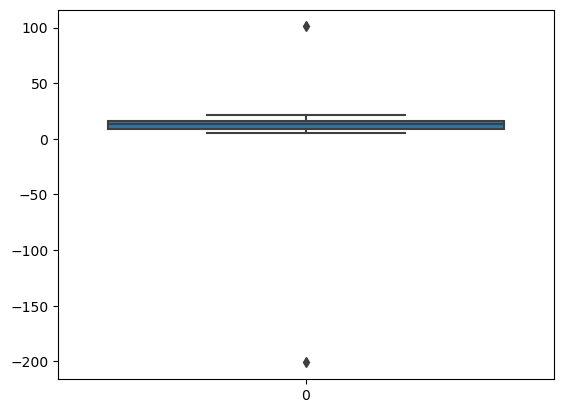

In [703]:
sns.boxplot(scores)

In [704]:
# IQR
# IQR=Q3-Q1
Q1=np.quantile(scores,0.25)
Q3=np.quantile(scores,0.75)
IQR=Q3-Q1

UB=Q3+1.5*IQR # Whiskers
LB=Q1-1.5*IQR # Whiskers
print(Q1,Q3,LB,UB)

outliers=scores[(scores<=LB) | (scores>=UB)]
print(outliers)

9.0 16.0 -1.5 26.5
[-201  101]


## Handling Outliers
* Remove the outliers considering the data imbalance
* Extending the IQR 
* Mean/Median used for imputation
* Use percentiles (10th , 90th) for imputing

<Axes: >

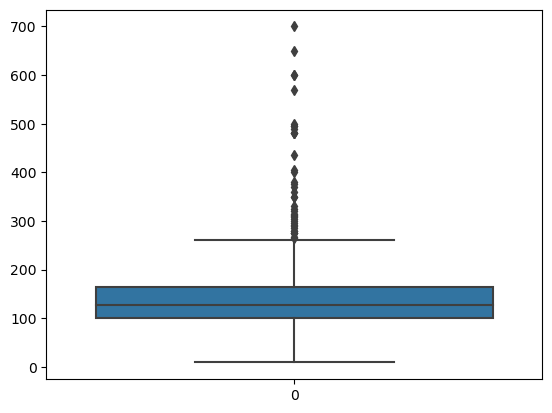

In [706]:
sns.boxplot(data=data['LoanAmount'])

In [707]:
# Remove the outliers
# IQR=Q3-Q1
Q1=np.quantile(data['LoanAmount'],0.25)
Q3=np.quantile(data['LoanAmount'],0.75)
IQR=Q3-Q1

# UB=Q3+3*IQR
# LB=Q1-3*IQR
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR

print(Q1,Q3,LB,UB)

outliers = data[(data['LoanAmount']<=LB) | (data['LoanAmount']>=UB)]
print(len(outliers))
# print(outliers)
# outliers

100.25 164.75 3.5 261.5
41


In [708]:
not_outliers=data[(data['LoanAmount']>LB) & (data['LoanAmount']<UB)]
print(len(not_outliers))

573


<Axes: >

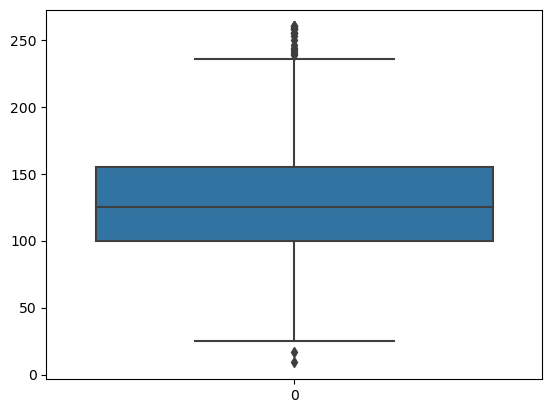

In [709]:
sns.boxplot(data=not_outliers['LoanAmount'])

## Removal of Improper Data
* 3+ to change into 3 or 4

## How to handle outliers

* Remove the outliers: if they are due to data entry error or they are not part of the data distribution
* Tranformations: log-tranform in case of skewed data use 
* Binning / discretization: grouping the data into bins

In [711]:
# Box plot 
px.box(data,x='LoanAmount')

In [712]:
fig=px.histogram(data,x='LoanAmount')
fig.show()

<Axes: xlabel='LoanAmount', ylabel='Density'>

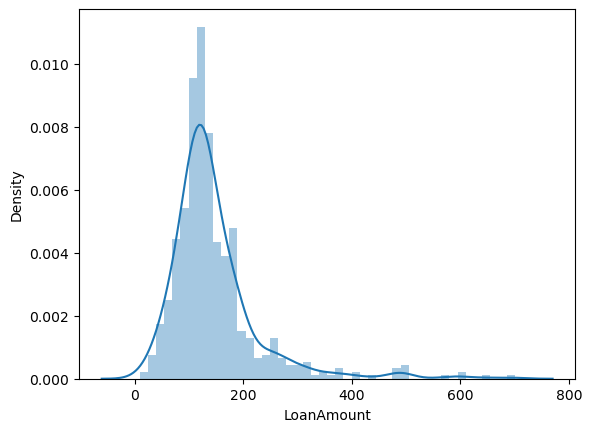

In [713]:
sns.distplot(data['LoanAmount'])

In [714]:
# Handle outliers with log tranform
data1=data
data1['LoanAmount'].head(3)

0    128.0
1    128.0
2     66.0
Name: LoanAmount, dtype: float64

In [715]:
data1['LoanAmount']=np.log(data1['LoanAmount'])
data1['LoanAmount'].head(3)

0    4.852030
1    4.852030
2    4.189655
Name: LoanAmount, dtype: float64

<Axes: xlabel='LoanAmount', ylabel='Density'>

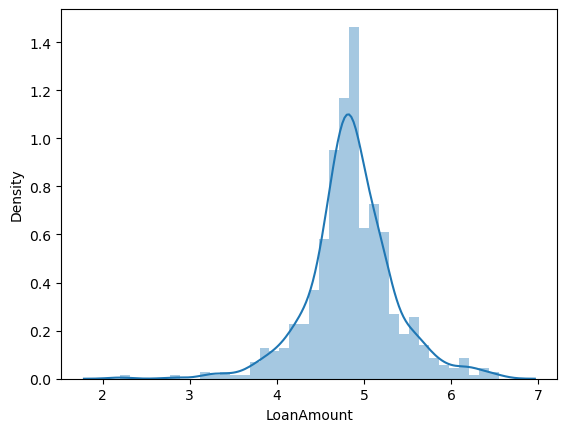

In [716]:
sns.distplot(data1['LoanAmount'])

In [717]:
# Remove the outliers
# IQR=Q3-Q1
Q1=np.quantile(data1['LoanAmount'],0.25)
Q3=np.quantile(data1['LoanAmount'],0.75)
IQR=Q3-Q1

UB=Q3+3*IQR
LB=Q1-3*IQR

#print(Q1,Q3,LB,UB)

outliers=data1[(data1['LoanAmount']<=LB) | (data1['LoanAmount']>=UB)]
print(len(outliers))

2


## Discrepancies / Inconsistencies in data

In [719]:
# Repalce 3+ with 4
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [720]:
data=data.replace(to_replace='3+',value=4)

In [721]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,4.852030,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,Y


In [722]:
data['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

# Feature Engineering

- Create a new feature / attribute
- Transform the existing feature 
- Feature can be numeric, categorical

## Variable Transformation
- Categorical Variable Transformations -Encoding Techniques
- Numeric Variable Transformation - Standardization and Normalization 

## Categorical Variable Transformations -Encoding Techniques
- one-hot encoding
- count encoding
- label encoding
- ordinal encoding

### one-hot encoding 
- Each category is represented as a binary vector with 0s and a single 1.
- One-hot encoding is preferred in situations where there is no ordinal relationship between categories, and each category is treated as independent.

In [723]:
#pip install -U scikit-learn
# pip install category_encoders

In [724]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
df=pd.DataFrame({'colors':['red','Green','blue','Green','red']})
encd=OneHotEncoder()
encoded_data=encd.fit_transform(df[['colors']])
encoded_data=pd.DataFrame(encoded_data.toarray(),columns=encd.get_feature_names_out())
print(encoded_data)

   colors_Green  colors_blue  colors_red
0           0.0          0.0         1.0
1           1.0          0.0         0.0
2           0.0          1.0         0.0
3           1.0          0.0         0.0
4           0.0          0.0         1.0


In [725]:
# blue Green red
# 0     0     1
# 0     1     0
# 1     0     0
# 0     1     0
# 0     0     1

In [726]:
#pip install category_encoders


### Count Encoding
- is used to convert categorical variables into numerical format by assigning the frequency count of each category

In [727]:
# Count Encoding
import pandas as pd
import category_encoders as ce
df=pd.DataFrame({'colors':['red','Green','blue','Green','red']})
encd = ce.CountEncoder()
encoded_data=encd.fit_transform(df['colors'])
encoded_data=pd.DataFrame(encoded_data,columns=encd.get_feature_names_out())
print(encoded_data)

   colors
0       2
1       2
2       1
3       2
4       2


In [728]:
# color    count
# red      2
# Green    2
# blue     1
# Green    2
# red      2


### Label Encoding
- Label encoding assigns a unique integer label to each category 

In [729]:
from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame({'Size': ["Small","Medium","Large","ExtraLarge"]})
df

,Size
0,Small
1,Medium
2,Large
3,ExtraLarge


In [730]:
# initialize the encoder
encd=LabelEncoder()

In [731]:
# Fit and transform the data
encd_data=encd.fit_transform(df['Size'])

In [732]:
df['Encd_data']=encd_data
print(df)

         Size  Encd_data
0       Small          3
1      Medium          2
2       Large          1
3  ExtraLarge          0


## Ordinal Encoding
- convert categorical into numerical while preserving the ordinal information

In [733]:
df1=pd.DataFrame({'FeedBack': ["Average","Good","Average","Poor","Excellent","Good","Verypoor","Good","Average","Poor","Excellent","Verypoor"]})
df1

# The scale is : VeryPoor:0, Poor:1,Average:2,Good:3,Excellent:4

,FeedBack
0,Average
1,Good
2,Average
3,Poor
4,Excellent
5,Good
6,Verypoor
7,Good
8,Average
9,Poor


In [734]:
# Define the order
order=["Verypoor","Poor","Average","Good","Excellent"]

In [735]:
# convert the categorical with specified order
df1['FeedBack_codes']=pd.Categorical(df1["FeedBack"], categories=order, ordered=True).codes
print(df1)

     FeedBack  FeedBack_codes
0     Average               2
1        Good               3
2     Average               2
3        Poor               1
4   Excellent               4
5        Good               3
6    Verypoor               0
7        Good               3
8     Average               2
9        Poor               1
10  Excellent               4
11   Verypoor               0


## Apply Encoding techniques on loan dataset 
- to convert categorical to numerical

In [736]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,4.852030,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,Y


In [737]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [738]:
# Binary Encoding Technique using map() function
data1=data
Gender_map={'Male':0,'Female':1}                
data1['Gender'] = data1['Gender'].map(Gender_map)    
data1['Gender'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

In [739]:
data1["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [740]:
Married_map={"Yes":1,"No":0}               
Dependents_map={"0":0,"1":1,"2":2,"3":3,"4":4}            
Education_map={"Graduate":1,"Not Graduate":0}             
Self_Employed_map={"Yes":1,"No":0}         
Property_Area_map={"Rural":0,"Urban":1,"Semiurban":2}         
Loan_Status_map={'Y':1,'N':0}   

In [741]:
data1['Married'] = data1['Married'].map(Married_map) 
data1['Dependents'] = data1['Dependents'].map(Dependents_map) 
data1['Education'] = data1['Education'].map(Education_map) 
data1['Self_Employed'] = data1['Self_Employed'].map(Self_Employed_map) 
data1['Property_Area'] = data1['Property_Area'].map(Property_Area_map) 
data1['Loan_Status'] = data1['Loan_Status'].map(Loan_Status_map) 

In [742]:
data1.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0.0,1,0,5849,0.0,4.852030,360.0,1.0,1,1
1,0,1,1.0,1,0,4583,1508.0,4.852030,360.0,1.0,0,0
2,0,1,0.0,1,1,3000,0.0,4.189655,360.0,1.0,1,1
3,0,1,0.0,0,0,2583,2358.0,4.787492,360.0,1.0,1,1
4,0,0,0.0,1,0,6000,0.0,4.948760,360.0,1.0,1,1


# Bivariate Analysis

- Examine the realtionship between two variables in the dataset
- The variables are independent and dependent (target Valable)